In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,HuberRegressor,RANSACRegressor,TheilSenRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('tipp.csv')
df = df.fillna(0)
print(df)

        blockage           ue_x          ue_y  ue_h           bs_x  \
0      98.524864  492300.246552  4.451783e+06   1.5  492222.671644   
1     101.215477  492300.246552  4.452169e+06   1.5  492222.671644   
2     103.270119  492300.246552  4.452556e+06   1.5  492222.671644   
3     104.932359  492300.246552  4.452943e+06   1.5  492222.671644   
4     106.327623  492300.246552  4.453329e+06   1.5  492222.671644   
...          ...            ...           ...   ...            ...   
8695    0.000000  525544.819744  4.488507e+06   1.5  527075.897344   
8696    0.000000  525544.819744  4.488893e+06   1.5  527075.897344   
8697    0.000000  525544.819744  4.489280e+06   1.5  527075.897344   
8698    0.000000  525544.819744  4.489666e+06   1.5  527075.897344   
8699    0.000000  525544.819744  4.490053e+06   1.5  527075.897344   

              bs_y  bs_h    freq         dist           y  
0     4.450730e+06  94.5  1900.0  1055.277293  112.630924  
1     4.450730e+06  94.5  1900.0  1441.

In [3]:
#set the input features
X = df[["blockage","ue_x", "ue_y", "ue_h","bs_x", "bs_y", "bs_h",'freq','dist']]
#X = df[["blockage","bs_h",'freq','dist']]

#set the target variable
Y = df[['y']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [4]:
rgr = RandomForestRegressor(n_estimators=100)

rgr.fit(X_train, y_train)

MSEs = cross_val_score(estimator=rgr,
                         X=X_train,
                         y=y_train.values.ravel(),
                         scoring='neg_mean_squared_error',
                         cv=5)

/tmp/ipykernel_2901155/850260227.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rgr.fit(X_train, y_train)


In [5]:
y_test = (np.concatenate(y_test.to_numpy()))
print(y_test)

[133.70140377 135.75380601 134.22961839 ... 118.02808364 100.47762714
 129.99224302]


In [6]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

y_pred_rgr = rgr.predict(X_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred_rgr) #default=True
print("Random Forest MAE:",mae)


Random Forest MAE: 0.9006155819799864


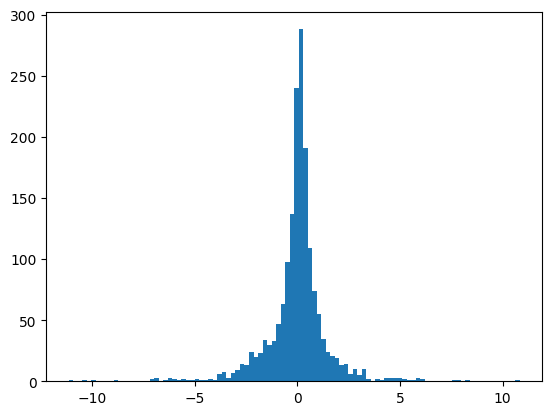

In [7]:
plt.hist(y_pred_rgr-y_test,bins=100)
plt.show()

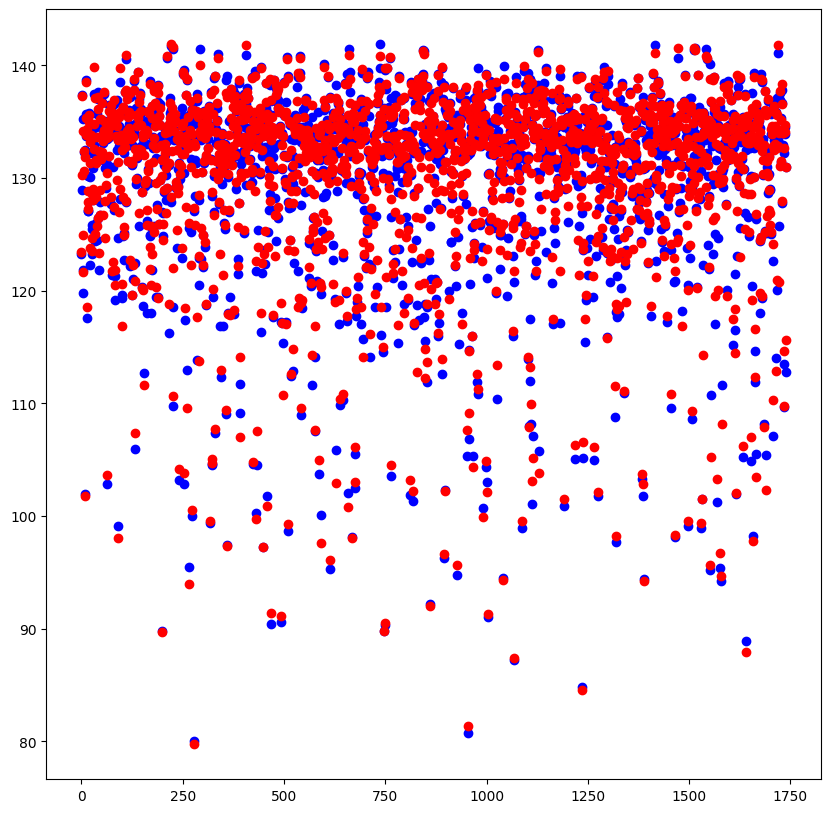

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')


Text(0, 0.5, 'Predictions ')

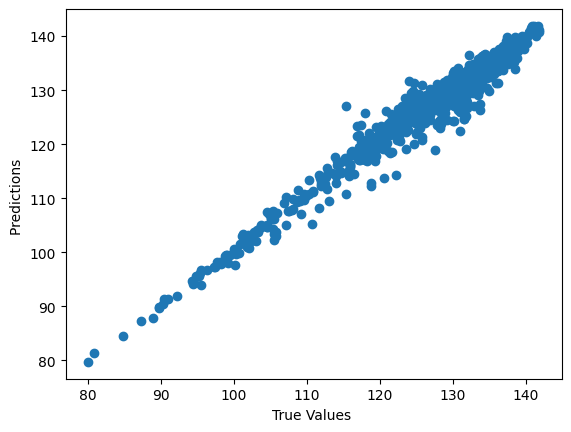

In [10]:
g=plt.scatter(y_test, y_pred)
g.axes.set_xlabel('True Values')
g.axes.set_ylabel('Predictions')

Text(0, 0.5, 'Predictions')

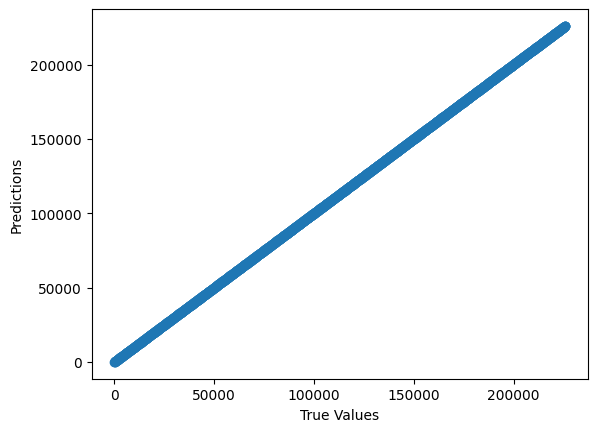

In [12]:
CY = np.cumsum(y_test)
CYP = np.cumsum(y_pred)
g=plt.scatter(CY,CYP)
g.axes.set_xlabel('True Values')
g.axes.set_ylabel('Predictions')